## Show distribution of parameters

['BulletCluster\\simulation_output_alpha.pickle', 'BulletCluster\\simulation_output_d_3d.pickle', 'BulletCluster\\simulation_output_d_max.pickle', 'BulletCluster\\simulation_output_d_proj.pickle', 'BulletCluster\\simulation_output_m_1.pickle', 'BulletCluster\\simulation_output_m_2.pickle', 'BulletCluster\\simulation_output_prob.pickle', 'BulletCluster\\simulation_output_T.pickle', 'BulletCluster\\simulation_output_TSM_0.pickle', 'BulletCluster\\simulation_output_TSM_1.pickle', 'BulletCluster\\simulation_output_v_3d_col.pickle', 'BulletCluster\\simulation_output_v_3d_obs.pickle', 'BulletCluster\\simulation_output_v_rad_obs.pickle', 'BulletCluster\\simulation_output_z_1.pickle', 'BulletCluster\\simulation_output_z_2.pickle']


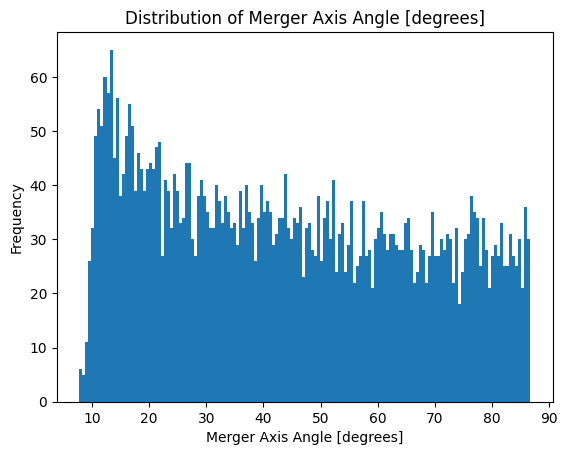

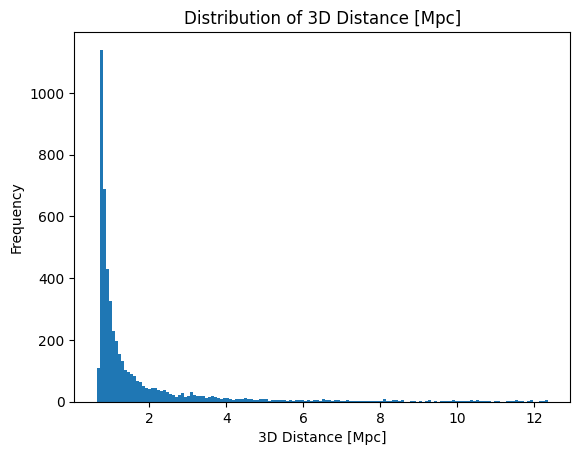

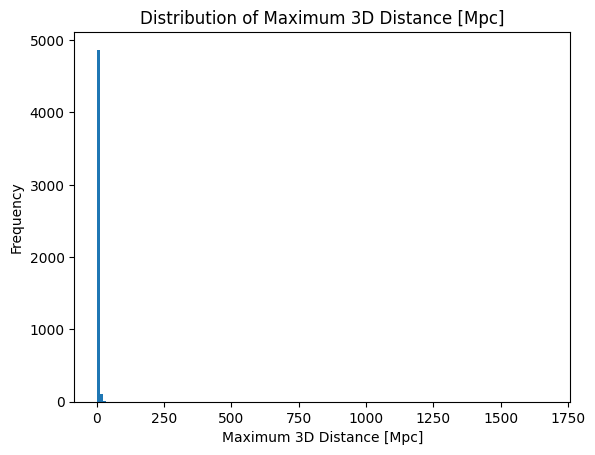

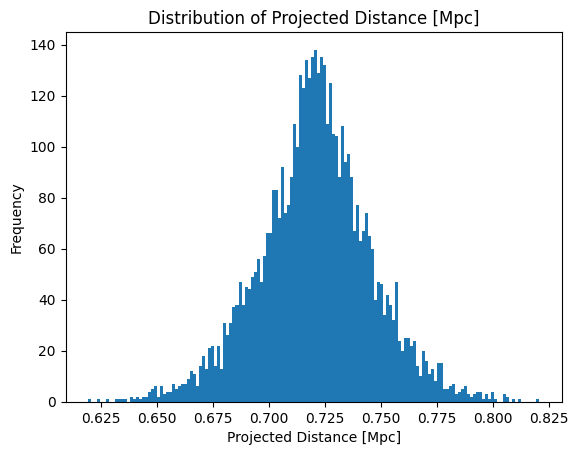

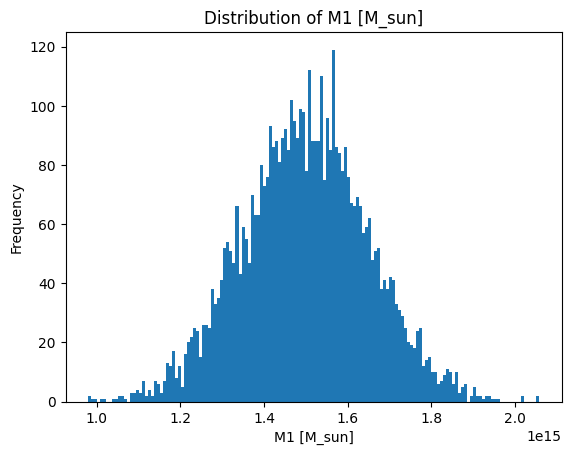

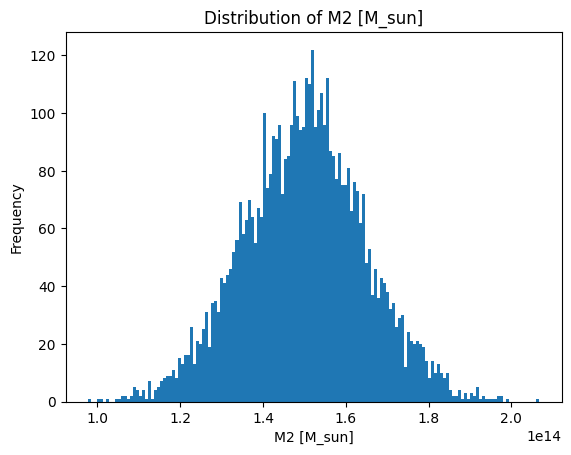

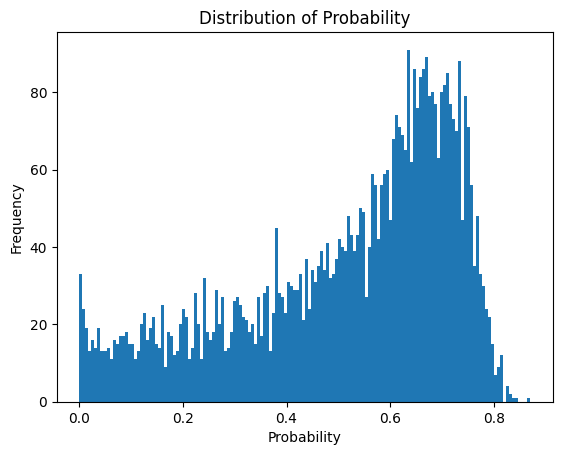

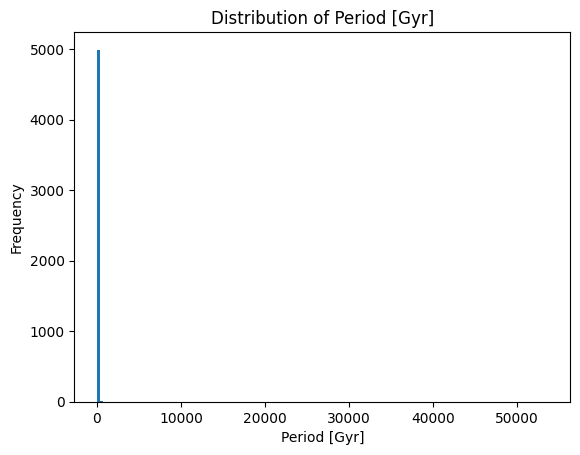

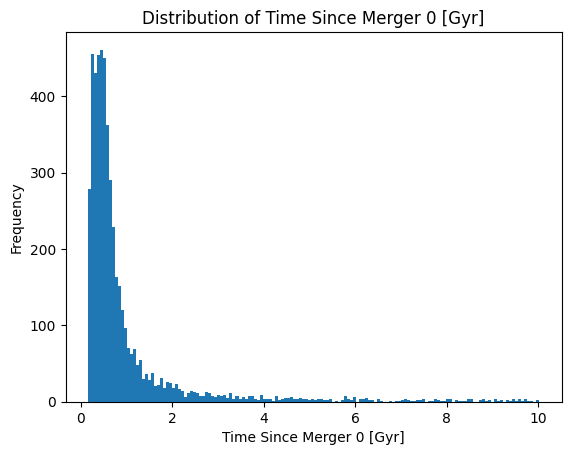

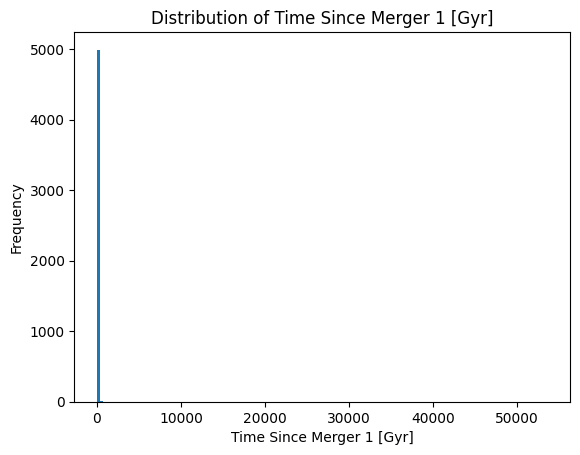

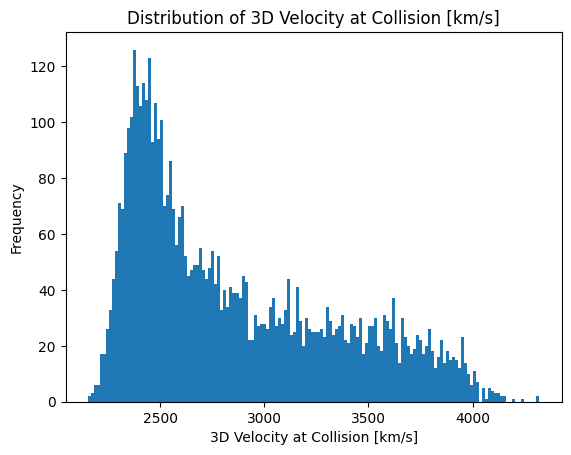

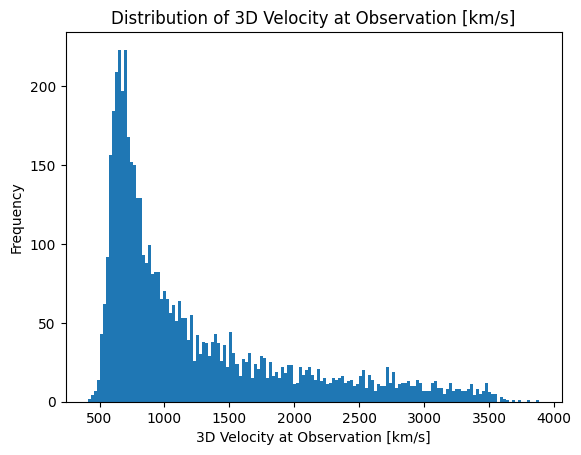

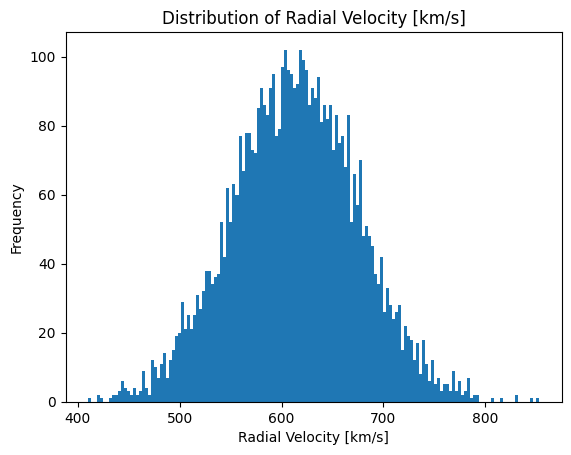

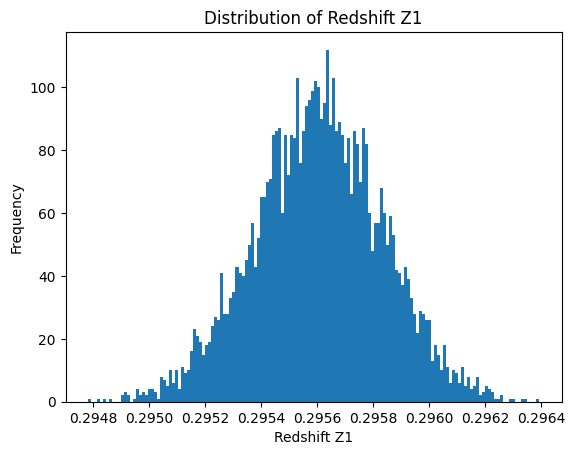

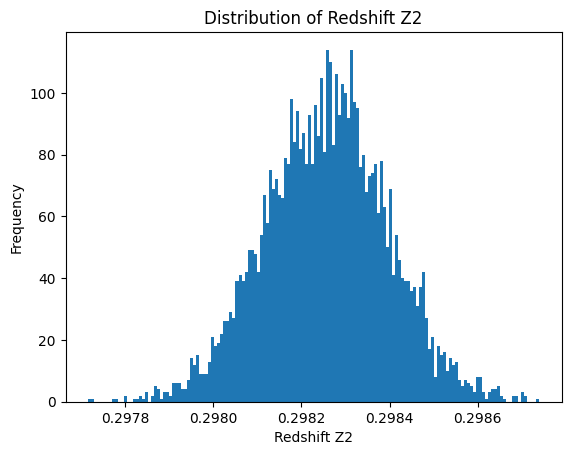

In [24]:
import pickle
import matplotlib.pyplot as plt
import glob

# Specify the prefix for the output files
prefix = "simulation_output"

# List all output files
output_files = glob.glob(f"BulletCluster/{prefix}_*.pickle")

# Mapping of filenames to labels
label_mapping = {
    '_m_1.pickle': 'M1 [M_sun]',
    '_m_2.pickle': 'M2 [M_sun]',
    '_z_1.pickle': 'Redshift Z1',
    '_z_2.pickle': 'Redshift Z2',
    '_d_proj.pickle': 'Projected Distance [Mpc]',
    '_v_rad_obs.pickle': 'Radial Velocity [km/s]',
    '_alpha.pickle': 'Merger Axis Angle [degrees]',
    '_v_3d_obs.pickle': '3D Velocity at Observation [km/s]',
    '_d_3d.pickle': '3D Distance [Mpc]',
    '_v_3d_col.pickle': '3D Velocity at Collision [km/s]',
    '_d_max.pickle': 'Maximum 3D Distance [Mpc]',
    '_TSM_0.pickle': 'Time Since Merger 0 [Gyr]',
    '_TSM_1.pickle': 'Time Since Merger 1 [Gyr]',
    '_T.pickle': 'Period [Gyr]',
    '_prob.pickle': 'Probability'
}

# Display the content of each file
print(output_files)
for file in output_files:
    with open(file, 'rb') as f:
        data = pickle.load(f)
        # Get the label from the filename
        for suffix, label in label_mapping.items():
            if file.endswith(suffix):
                plt.hist(data, bins=150)
                plt.xlabel(label)
                plt.ylabel('Frequency')
                plt.title(f'Distribution of {label}')
                plt.show()
                break


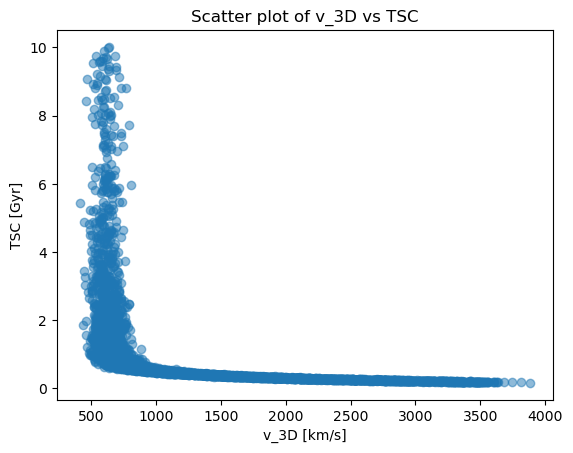

In [25]:
import pickle
import matplotlib.pyplot as plt

# 出力ファイルのプレフィックスを指定
prefix = "BulletCluster/simulation_output"

# 必要なファイルを読み込む
with open(prefix + '_v_3d_obs.pickle', 'rb') as f:
    v_3d_obs = pickle.load(f)

with open(prefix + '_TSM_0.pickle', 'rb') as f:
    TSM_0 = pickle.load(f)

# 散布図の作成
plt.scatter(v_3d_obs, TSM_0, alpha=0.5)
plt.xlabel('v_3D [km/s]')
plt.ylabel('TSC [Gyr]')
plt.title('Scatter plot of v_3D vs TSC')
plt.show()

## Bullet Cluster Parameter Estimates

In [10]:
import pickle
import numpy as np
from astropy.stats import biweight_location

prefix = "BulletCluster/simulation_output"
parameters = ['_m_1.pickle', '_m_2.pickle', '_z_1.pickle', '_z_2.pickle', '_d_proj.pickle', 
              '_v_rad_obs.pickle', '_alpha.pickle', '_v_3d_obs.pickle', '_d_3d.pickle', 
              '_v_3d_col.pickle', '_d_max.pickle', '_TSM_0.pickle', '_TSM_1.pickle', 
              '_T.pickle', '_prob.pickle']

results = {}

for param in parameters:
    with open(prefix + param, 'rb') as f:
        data = pickle.load(f)
        if param in ['_m_1.pickle', '_m_2.pickle']:
            # 質量をe14単位に変換
            data = np.array(data) / 1e14
        biweight_loc = biweight_location(data)
        
        # 68%および95%の信頼区間を計算
        lcl_68, ucl_68 = np.percentile(data, [16, 84])
        lcl_95, ucl_95 = np.percentile(data, [2.5, 97.5])
        
        results[param] = {
            'biweight_location': biweight_loc,
            '68%_LCL': lcl_68,
            '68%_UCL': ucl_68,
            '95%_LCL': lcl_95,
            '95%_UCL': ucl_95
        }

# 結果の表示
for param, res in results.items():
    print(f"{param}:")
    print(f"  Biweight Location: {res['biweight_location']}")
    print(f"  68% LCL: {res['68%_LCL']}, 68% UCL: {res['68%_UCL']}")
    print(f"  95% LCL: {res['95%_LCL']}, 95% UCL: {res['95%_UCL']}")
    print()

_m_1.pickle:
  Biweight Location: 14.990576259641777
  68% LCL: 13.471919793619042, 68% UCL: 16.46607430492319
  95% LCL: 12.018553354664578, 95% UCL: 17.934258256479225

_m_2.pickle:
  Biweight Location: 1.500205919464879
  68% LCL: 1.352811295159857, 68% UCL: 1.6404988409904295
  95% LCL: 1.20919359138466, 95% UCL: 1.791968539323281

_z_1.pickle:
  Biweight Location: 0.2956072264016765
  68% LCL: 0.29538220893388145, 68% UCL: 0.2958349555306966
  95% LCL: 0.2951540885261627, 95% UCL: 0.29605116830714817

_z_2.pickle:
  Biweight Location: 0.29825729540202717
  68% LCL: 0.29811791469531806, 68% UCL: 0.29839289479656445
  95% LCL: 0.297980911476857, 95% UCL: 0.29853052487223436

_d_proj.pickle:
  Biweight Location: 0.7207931131657918
  68% LCL: 0.6972571508465703, 68% UCL: 0.7437950149114142
  95% LCL: 0.6695288220364792, 95% UCL: 0.7722644509606335

_v_rad_obs.pickle:
  Biweight Location: 613.035254129952
  68% LCL: 552.8529312988096, 68% UCL: 674.1627377449535
  95% LCL: 493.006365797

In [29]:
import pickle
import numpy as np
import pandas as pd
from astropy.stats import biweight_location

# 単位の定義
units = {
    'm1': '10^14 M☉',
    'm2': '10^14 M☉',
    'z1': '',
    'z2': '',
    'dproj': 'Mpc',
    'vradobs': 'km s^{-1}',
    'alpha': 'degree',
    'v3dobs': 'km s^{-1}',
    'd3d': 'Mpc',
    'v3dcol': 'km s^{-1}',
    'dmax': 'Mpc',
    'TSM0': 'Gyr',
    'TSM1': 'Gyr',
    'T': 'Gyr',
    'prob': ''
}

# パラメータファイルのリスト
prefix = "BulletCluster/simulation_output"
parameters = ['_m_1.pickle', '_m_2.pickle', '_z_1.pickle', '_z_2.pickle', '_d_proj.pickle', 
              '_v_rad_obs.pickle', '_alpha.pickle', '_v_3d_obs.pickle', '_d_3d.pickle', 
              '_v_3d_col.pickle', '_d_max.pickle', '_TSM_0.pickle', '_TSM_1.pickle', 
              '_T.pickle', '_prob.pickle']

results = []

for param in parameters:
    with open(prefix + param, 'rb') as f:
        data = pickle.load(f)
        if param in ['_m_1.pickle', '_m_2.pickle']:
            # 質量をe14単位に変換
            data = np.array(data) / 1e14
        biweight_loc = biweight_location(data)
        
        # 68%および95%の信頼区間を計算
        lcl_68, ucl_68 = np.percentile(data, [16, 84])
        lcl_95, ucl_95 = np.percentile(data, [2.5, 97.5])
        
        param_name = param.replace('_', '').replace('.pickle', '')
        
        # 数値を有効数字2桁にフォーマット
        if param_name not in ['z_1', 'z_2']:
            biweight_loc = round(biweight_loc, 2)
            lcl_68 = round(lcl_68, 2)
            ucl_68 = round(ucl_68, 2)
            lcl_95 = round(lcl_95, 2)
            ucl_95 = round(ucl_95, 2)
        
        results.append({
            'Parameter': param_name,
            'Units': units[param_name],
            'Biweight Location': biweight_loc,
            '68% LCL': lcl_68,
            '68% UCL': ucl_68,
            '95% LCL': lcl_95,
            '95% UCL': ucl_95
        })

# 結果をDataFrameに変換
df_results = pd.DataFrame(results)

# DataFrameの表示
df_results


,Parameter,Units,Biweight Location,68% LCL,68% UCL,95% LCL,95% UCL
0,m1,10^14 M☉,14.99,13.47,16.47,12.02,17.93
1,m2,10^14 M☉,1.50,1.35,1.64,1.21,1.79
2,z1,,0.30,0.30,0.30,0.30,0.30
3,z2,,0.30,0.30,0.30,0.30,0.30
4,dproj,Mpc,0.72,0.70,0.74,0.67,0.77
5,vradobs,km s^{-1},613.04,552.85,674.16,493.01,734.18
6,alpha,degree,43.54,17.90,71.98,10.88,84.48
7,v3dobs,km s^{-1},931.40,646.32,1997.94,550.00,3195.70
8,d3d,Mpc,0.96,0.76,2.33,0.72,7.46
9,v3dcol,km s^{-1},2768.72,2389.65,3464.77,2277.04,3916.95
